<a href="https://colab.research.google.com/github/ejeager2003/Credit-card-fraud-detection/blob/main/Mechanical_Component_Fault_detetction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
import random
%matplotlib inline

In [ ]:
base_path = '../content/data'

### Checking for each dataset. How many each image data belong with?

In [ ]:
print(f"There are {len(os.listdir(base_path))} type of dataset")

There are 3 type of dataset


<Axes: >

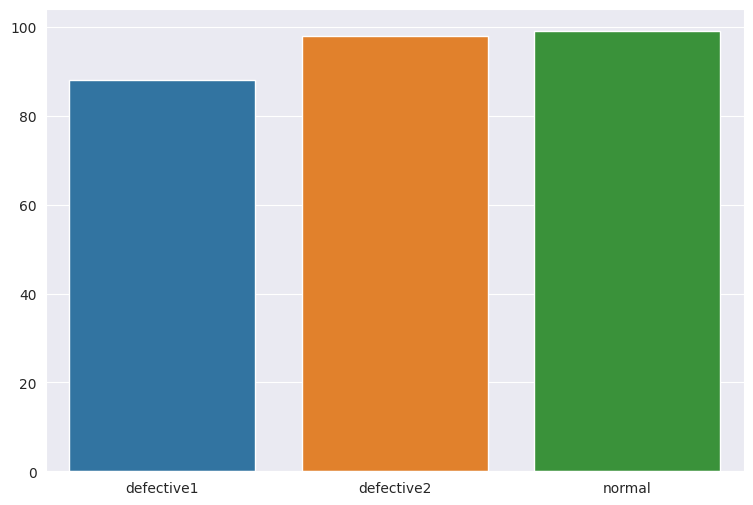

In [ ]:
data_set = []
amount_of_each = []
for folder in os.listdir(base_path):
    data_set.append(folder)
    amount_of_each.append(len(os.listdir(os.path.join(base_path,folder))))

plt.figure(figsize=(9,6))
sns.set_style('darkgrid')
sns.barplot(x = data_set,y = amount_of_each)

## Visualize each type of dataset

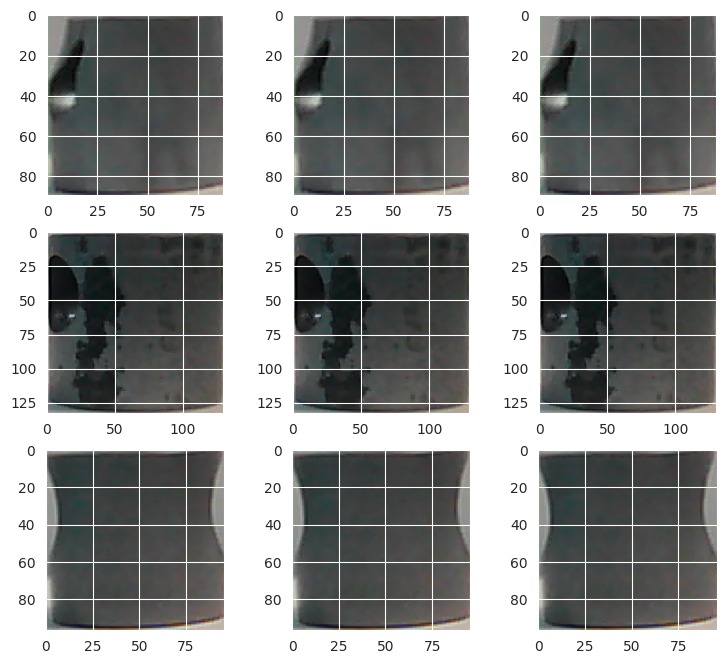

In [ ]:
fig,ax = plt.subplots(3,3,figsize=(9,8))
for i in range(3):
    file_name = random.choice(os.listdir(os.path.join(base_path,data_set[i])))
    folder = os.path.join(base_path,data_set[i])
    for j in range(3):
        img = cv2.imread(os.path.join(folder,file_name))
        ax[i,j].imshow(img)

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Flatten,Dropout
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16,ResNet50,EfficientNetB6,Xception
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[]

## Create model by using Resnet pretrained model

In [ ]:
resnet = ResNet50(include_top=False,input_shape=(80,80,3))
for layer in resnet.layers:
    layer.trainable = False
flat = Flatten()((resnet.layers[-1].output))
dense1 = Dense(1024,activation='relu')(flat)
dense2 = Dense(512,activation='relu')(dense1)
drop = Dropout(0.2)(dense2)
model_output = Dense(3,activation = 'softmax')(drop)
model = Model(resnet.input,model_output)
# model.summary()

In [ ]:
callback = ModelCheckpoint('./checkpoint.ckt',save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
earlystop = EarlyStopping(monitor='val_accuracy',patience=15,mode='max',restore_best_weights=True)
model.compile(optimizer=RMSprop(learning_rate=0.001),loss = 'categorical_crossentropy',metrics=['accuracy'])

In [ ]:
data_gen = ImageDataGenerator(brightness_range=[1.5,2.5],
                              rotation_range = 0.6,validation_split=0.3)

In [ ]:
train_data = data_gen.flow_from_directory(base_path,target_size=(80,80),subset='training')
valid_data = data_gen.flow_from_directory(base_path,target_size=(80,80),subset='validation')

Found 201 images belonging to 3 classes.
Found 84 images belonging to 3 classes.


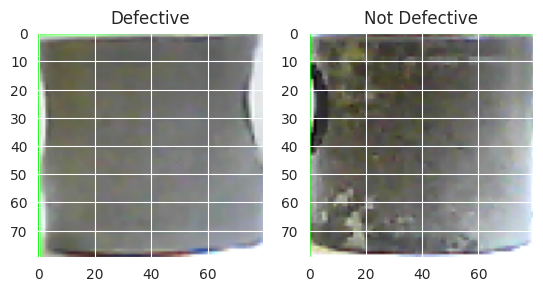

In [ ]:
# Get one batch of images from the training data generator
images, labels = train_data[3]

# Find the indices of the first images for each class
defective_index = np.argmax(labels == 0)
not_defective_index = np.argmax(labels == 1)

# Display the first defective image
plt.subplot(1, 2, 1)
plt.imshow(images[defective_index].astype(np.uint8))
plt.title("Defective")

# Display the first not defective image
plt.subplot(1, 2, 2)
plt.imshow(images[not_defective_index].astype(np.uint8))
plt.title("Not Defective")

plt.show()





In [ ]:
history= model.fit(train_data,epochs=8,validation_data=valid_data,callbacks=[callback])

Epoch 1/8
7/7 [==============================] - 18s 2s/step - loss: 46.3194 - accuracy: 0.5373 - val_loss: 1.9321 - val_accuracy: 0.8333
Epoch 2/8
7/7 [==============================] - 13s 2s/step - loss: 0.7144 - accuracy: 0.9552 - val_loss: 0.4611 - val_accuracy: 0.8810
Epoch 3/8
7/7 [==============================] - 13s 2s/step - loss: 0.0772 - accuracy: 0.9701 - val_loss: 0.1204 - val_accuracy: 0.9762
Epoch 4/8
7/7 [==============================] - 11s 2s/step - loss: 1.4981 - accuracy: 0.9104 - val_loss: 0.0852 - val_accuracy: 0.9643
Epoch 5/8
7/7 [==============================] - 12s 2s/step - loss: 0.0868 - accuracy: 0.9851 - val_loss: 0.2445 - val_accuracy: 0.9405
Epoch 6/8
7/7 [==============================] - 9s 1s/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.2284 - val_accuracy: 0.9167
Epoch 7/8
7/7 [==============================] - 11s 2s/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0801 - val_accuracy: 0.9643
Epoch 8/8
7/7 [==========================

1/1 [==============================] - 1s 1s/step


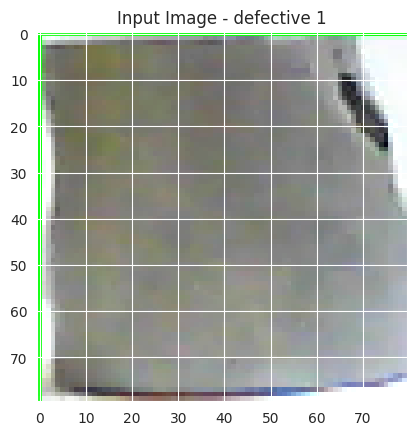

defective 1: 1.0000
defective 2: 0.0000
normal: 0.0000
1/1 [==============================] - 0s 93ms/step


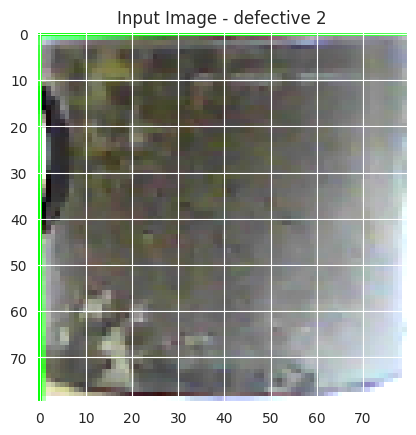

defective 1: 0.0000
defective 2: 1.0000
normal: 0.0000
1/1 [==============================] - 0s 103ms/step


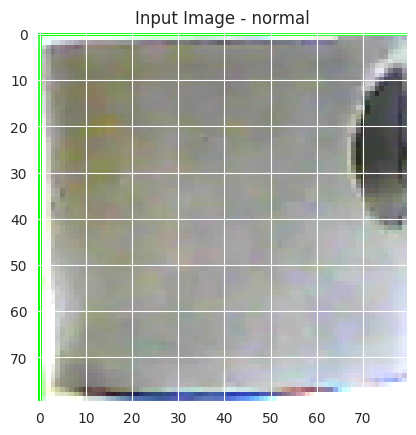

defective 1: 0.0000
defective 2: 0.0000
normal: 1.0000


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'model' is already loaded and fitted
# Assuming 'train_data' is the training data generator

# Define class names
class_names = ['defective 1', 'defective 2', 'normal']

# Function to display predictions for a given class index
def display_predictions(class_index):
    # Get one batch of images for the specified class from the training data generator
    images, labels = train_data.next()
    class_indices = np.where(labels[:, class_index] == 1)[0]

    # Choose one image from the specified class
    image_index = class_indices[0]
    selected_image = images[image_index]

    # Reshape the image to fit the model input shape
    selected_image = np.expand_dims(selected_image, axis=0)

    # Get the model predictions for the selected image
    predictions = model.predict(selected_image)

    # Display the selected image
    plt.imshow(selected_image[0].astype(np.uint8))
    plt.title(f"Input Image - {class_names[class_index]}")
    plt.show()

    # Display the model predictions for the selected image
    for i, prob in enumerate(predictions[0]):
        print(f"{class_names[i]}: {prob:.4f}")

# Display predictions for each class
for class_index in range(3):  # Assuming you have 3 classes
    display_predictions(class_index)


1/1 [==============================] - 0s 83ms/step


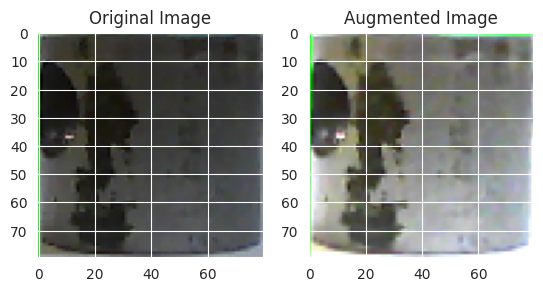

Class1: 0.0000
Class2: 1.0000
Class3: 0.0000


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image

# Assuming 'model' is already loaded and fitted
# Assuming 'data_gen' is the ImageDataGenerator

# Load and preprocess the input image
image_path = "/content/data/defective2/kumda_component10.png"  # Replace with the path to your input image
img = image.load_img(image_path, target_size=(80, 80))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

# Use the data generator to augment the input image array
augmented_img_array = data_gen.random_transform(img_array[0])  # Use the first element

# Reshape the augmented image array to match the expected input shape
augmented_img_array = np.expand_dims(augmented_img_array, axis=0)

# Get the model predictions for the augmented image
predictions = model.predict(augmented_img_array)

# Display the input image
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original Image")

# Display the augmented image
plt.subplot(1, 2, 2)
plt.imshow(augmented_img_array[0].astype(np.uint8))
plt.title("Augmented Image")

plt.show()

# Display the model predictions for the augmented image
class_names = ["Class1", "Class2", "Class3"]  # Replace with your actual class names
for i, prob in enumerate(predictions[0]):
    print(f"{class_names[i]}: {prob:.4f}")
